In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
seed = 7
np.random.seed(seed)

data = pd.read_csv('forestfires (1).csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
data.shape

(517, 31)

In [7]:
data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [8]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
data.drop(['month','day'],axis=1,inplace=True)

In [11]:
le = LabelEncoder()
data['size_category'] = le.fit_transform(data['size_category'])

## Model Building

In [14]:
X = data.drop('size_category',axis=1)
y = data['size_category']

In [15]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [17]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [18]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=15,stratify = y)

In [19]:
X_train

array([[ 0.66282354, -0.4027903 ,  0.58250492, ..., -0.04402255,
        -0.17285971,  1.41626761],
       [ 0.49962543,  0.53962527,  0.69992594, ..., -0.04402255,
        -0.17285971,  1.41626761],
       [ 0.15509608,  1.98997626,  0.73704873, ..., -0.04402255,
        -0.17285971, -0.70608125],
       ...,
       [-1.07795633, -1.31551118, -0.78821394, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 0.33642731,  0.15984586,  0.51027687, ..., -0.04402255,
        -0.17285971,  1.41626761],
       [ 0.26389482, -0.18555022,  0.7963645 , ..., -0.04402255,
        -0.17285971,  1.41626761]])

In [20]:
X_test

array([[ 0.31829419,  0.10983376,  0.48445232, ..., -0.04402255,
        -0.17285971,  1.41626761],
       [ 0.26389482,  0.6521525 ,  0.44490847, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 0.08256358, -0.35434107,  0.74148733, ..., -0.04402255,
        -0.17285971,  1.41626761],
       ...,
       [ 0.1732292 ,  2.14938984,  0.83066274, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 0.06443046,  0.87564409,  0.82582063, ..., -0.04402255,
        -0.17285971, -0.70608125],
       [ 0.19136233, -0.97480373,  0.59783825, ..., -0.04402255,
         5.78503817, -0.70608125]])

In [21]:
y_test

208    0
270    1
401    1
26     1
313    1
      ..
201    0
343    1
425    1
507    1
226    0
Name: size_category, Length: 104, dtype: int32

In [22]:
model = Sequential()
model.add(Dense(28,input_dim=28,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.fit(X_train,y_train,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
28/28 [==============================] - 1s 15ms/step - loss: 0.6535 - accuracy: 0.6304 - val_loss: 0.6418 - val_accuracy: 0.7226
Epoch 2/150
28/28 [==============================] - 0s 4ms/step - loss: 0.6018 - accuracy: 0.7246 - val_loss: 0.6237 - val_accuracy: 0.7445
Epoch 3/150
28/28 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.7246 - val_loss: 0.6125 - val_accuracy: 0.7445
Epoch 4/150
28/28 [==============================] - 0s 4ms/step - loss: 0.5502 - accuracy: 0.7283 - val_loss: 0.6064 - val_accuracy: 0.7445
Epoch 5/150
28/28 [==============================] - 0s 4ms/step - loss: 0.5290 - accuracy: 0.7355 - val_loss: 0.6013 - val_accuracy: 0.7810
Epoch 6/150
28/28 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.7500 - val_loss: 0.6014 - val_accuracy: 0.7883
Epoch 7/150
28/28 [==============================] - 0s 4ms/step - loss: 0.4912 - accuracy: 0.7536 - val_loss: 0.6003 - val_accuracy: 0.7956
Epoch 8/150


28/28 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 1.0000 - val_loss: 1.1675 - val_accuracy: 0.8467
Epoch 59/150
28/28 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 1.1801 - val_accuracy: 0.8540
Epoch 60/150
28/28 [==============================] - 0s 4ms/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 1.1839 - val_accuracy: 0.8540
Epoch 61/150
28/28 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 1.2034 - val_accuracy: 0.8540
Epoch 62/150
28/28 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 1.2205 - val_accuracy: 0.8613
Epoch 63/150
28/28 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 1.2289 - val_accuracy: 0.8540
Epoch 64/150
28/28 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 1.2517 - val_accuracy: 0.8613
Epoch 65/150
28/28 

28/28 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.6815 - val_accuracy: 0.8832
Epoch 116/150
28/28 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.6845 - val_accuracy: 0.8832
Epoch 117/150
28/28 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.6981 - val_accuracy: 0.8832
Epoch 118/150
28/28 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.6994 - val_accuracy: 0.8832
Epoch 119/150
28/28 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.7092 - val_accuracy: 0.8832
Epoch 120/150
28/28 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.7149 - val_accuracy: 0.8759
Epoch 121/150
28/28 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.7258 - val_accuracy: 0.8832
Epoch 122/150

## Model testing 

In [25]:
y_pred_train = model.predict(X_train)
rounded = [round(x[0]) for x in y_pred_train]

In [26]:
y_pred_train1 = pd.DataFrame(rounded)

In [27]:
y_pred_train1

,0
0,1
1,1
2,1
3,1
4,1
...,...
408,0
409,1
410,0
411,1


In [28]:
y_pred_test = model.predict(X_test)
rounded1    = [round(x[0]) for x in y_pred_test]

In [29]:
y_pred_test1 = pd.DataFrame(rounded1)
y_pred_test1

,0
0,0
1,1
2,1
3,1
4,1
...,...
99,0
100,1
101,1
102,1


In [30]:
Accuracy_Train = model.evaluate(X_train,y_pred_train1,verbose=0)
Accuracy_Train

[0.010360568761825562, 1.0]

In [31]:
Accuracy_Test = model.evaluate(X_test,y_pred_test1,verbose=0)
Accuracy_Test

[0.022686515003442764, 1.0]

## Visualizing Accuracy and Loss

In [32]:
History = model.fit(X_test,y_pred_test1,validation_split=0.33,epochs=150,batch_size=10)

Epoch 1/150
7/7 [==============================] - 1s 17ms/step - loss: 0.0357 - accuracy: 0.9855 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 2/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 5/150
7/7 [==============================] - 0s 13ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 6/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 7/150
7/7 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 8/150
7/7 [===

Epoch 58/150
7/7 [==============================] - 0s 9ms/step - loss: 2.6142e-04 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 59/150
7/7 [==============================] - 0s 9ms/step - loss: 2.5858e-04 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 60/150
7/7 [==============================] - 0s 11ms/step - loss: 2.5728e-04 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 61/150
7/7 [==============================] - 0s 9ms/step - loss: 2.5427e-04 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 62/150
7/7 [==============================] - 0s 9ms/step - loss: 2.4824e-04 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 63/150
7/7 [==============================] - 0s 11ms/step - loss: 2.4695e-04 - accuracy: 1.0000 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 64/150
7/7 [==============================] - 0s 8ms/step - loss: 2.4470e-04 - accuracy: 1.0000 - val_loss: 0.0185 - val_accurac

7/7 [==============================] - 0s 10ms/step - loss: 1.5498e-04 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 0.9714
Epoch 115/150
7/7 [==============================] - 0s 12ms/step - loss: 1.5295e-04 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 0.9714
Epoch 116/150
7/7 [==============================] - 0s 8ms/step - loss: 1.5215e-04 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 0.9714
Epoch 117/150
7/7 [==============================] - 0s 11ms/step - loss: 1.5107e-04 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 0.9714
Epoch 118/150
7/7 [==============================] - 0s 13ms/step - loss: 1.5050e-04 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 0.9714
Epoch 119/150
7/7 [==============================] - 0s 12ms/step - loss: 1.4893e-04 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 0.9714
Epoch 120/150
7/7 [==============================] - 0s 11ms/step - loss: 1.4747e-04 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 

In [33]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

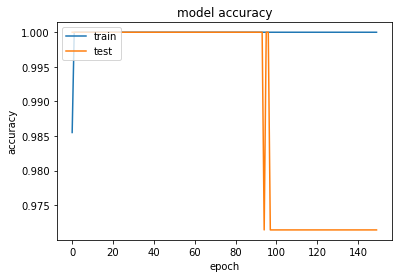

In [34]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


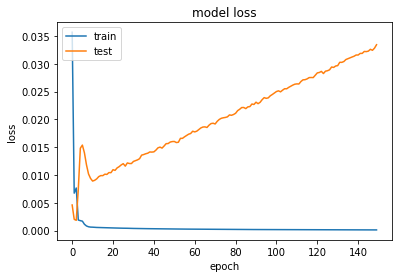

In [35]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Tuning of Hyperparameters : Batch Size and epochs

In [36]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [37]:
!pip install optimizers

  Created wheel for optimizers: filename=Optimizers-2.1-py3-none-any.whl size=2285 sha256=6224537e05845c419c31bbb3789875350a03939b58b82b8c8b9d37139251362c
  Stored in directory: c:\users\monit\appdata\local\pip\cache\wheels\1d\e3\e3\f0a9b8fd8a9271274d03d4c15e4fed24a70b1d1b0f571bec66
Successfully built optimizers


In [38]:
# create model
def create_model():
    model1 = Sequential()
    model1.add(Dense(30, input_dim=28, activation='relu'))
    model1.add(Dense(28, activation='relu'))
    model1.add(Dense(1,activation='sigmoid'))
    
   
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model1

In [39]:
# Create the model

model2 = KerasClassifier(build_fn = create_model,verbose = 0)



In [40]:
# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]



In [41]:
# Make a dictionary of the grid search parameters

param_grid = dict(batch_size = batch_size,epochs = epochs)



In [42]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model2,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_scaled,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.6s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.5s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.5s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.6s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.4s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

[CV 2/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.4s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
[CV 3/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.6s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.9s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.4s


In [56]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8780619978904725, using {'batch_size': 10, 'epochs': 100}
0.7481516003608704,0.1138919142449346 with: {'batch_size': 10, 'epochs': 10}
0.860567593574524,0.058740325537249324 with: {'batch_size': 10, 'epochs': 50}
0.8780619978904725,0.05445464004045931 with: {'batch_size': 10, 'epochs': 100}
0.7248879909515381,0.13058610598489112 with: {'batch_size': 20, 'epochs': 10}
0.8354929089546204,0.06200882943655235 with: {'batch_size': 20, 'epochs': 50}
0.8780059695243836,0.052924564608835954 with: {'batch_size': 20, 'epochs': 100}
0.7325242638587952,0.15606928938188888 with: {'batch_size': 40, 'epochs': 10}
0.7754480957984924,0.06262387268438156 with: {'batch_size': 40, 'epochs': 50}
0.8451082944869995,0.06947473939297738 with: {'batch_size': 40, 'epochs': 100}


## Best result ,when batch-size = 10 and epochs=100

## Tuning of Hyperparameter :Number of neurons in activation layer

In [43]:
# Defining the model

def create_model1(neuron1,neuron2):
    model3 = Sequential()
    model3.add(Dense(neuron1,input_dim = 28,activation = 'relu'))
    model3.add(Dense(neuron2,activation = 'relu'))
    model3.add(Dense(1,activation = 'sigmoid'))
    
    model3.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model3

In [44]:
# Create the model

model4 = KerasClassifier(build_fn = create_model1,verbose = 0,batch_size = 40,epochs = 10)



In [45]:
# Define the grid search parameters

neuron1 = [24,28,35]
neuron2 = [20,24,28]



In [46]:
# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)



In [47]:
# Build and fit the GridSearchCV

grid2        = GridSearchCV(estimator = model4,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result2 = grid2.fit(x_scaled,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 1/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   1.0s
[CV 2/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 2/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   1.0s
[CV 3/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 3/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   0.9s
[CV 4/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 4/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   0.9s
[CV 5/5; 1/9] START neuron1=24, neuron2=20......................................
[CV 5/5; 1/9] END ....................neuron1=24, neuron2=20; total time=   0.9s
[CV 1/5; 2/9] START neuron1=24, neuron2=24......................................
[CV 1/5; 2/9] END ....................neuron1=24,

In [48]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7325989484786988, using {'neuron1': 35, 'neuron2': 20}
0.7209671378135681,0.1378870136506599 with: {'neuron1': 24, 'neuron2': 20}
0.7248319625854492,0.14383644916528962 with: {'neuron1': 24, 'neuron2': 24}
0.7228902101516723,0.14636961424053557 with: {'neuron1': 24, 'neuron2': 28}
0.7228902101516723,0.14598271174689065 with: {'neuron1': 28, 'neuron2': 20}
0.7114077568054199,0.11363371617532012 with: {'neuron1': 28, 'neuron2': 24}
0.7190627336502076,0.1368140496545262 with: {'neuron1': 28, 'neuron2': 28}
0.7325989484786988,0.13784100117748913 with: {'neuron1': 35, 'neuron2': 20}
0.7171396613121033,0.12789828505426384 with: {'neuron1': 35, 'neuron2': 24}
0.7268483877182007,0.11626632806248637 with: {'neuron1': 35, 'neuron2': 28}


##  Best result at 1st layer 28 Neuron and 2nd layer 24 neuron

## Tuning Hyperparameter : Activation function

In [49]:
# Defining the model

def create_model2(activation_function):
    model4 = Sequential()
    model4.add(Dense(28,input_dim = 28,activation = activation_function))
    model4.add(Dense(24,activation = activation_function))
    model4.add(Dense(1,activation = 'sigmoid'))
    
    model4.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model4

In [50]:
# Create the model

model5 = KerasClassifier(build_fn = create_model2,verbose = 0,batch_size = 40,epochs = 10)



In [51]:
# Define the grid search parameters
activation_function = ['softmax','relu','tanh']



In [52]:
# Make a dictionary of the grid search parameters

param_grids = dict(activation_function=activation_function)



In [53]:
# Build and fit the GridSearchCV

grid3        = GridSearchCV(estimator = model5,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(x_scaled,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START activation_function=softmax.................................
[CV 1/5; 1/3] END ...............activation_function=softmax; total time=   1.3s
[CV 2/5; 1/3] START activation_function=softmax.................................
[CV 2/5; 1/3] END ...............activation_function=softmax; total time=   1.1s
[CV 3/5; 1/3] START activation_function=softmax.................................
[CV 3/5; 1/3] END ...............activation_function=softmax; total time=   1.1s
[CV 4/5; 1/3] START activation_function=softmax.................................
[CV 4/5; 1/3] END ...............activation_function=softmax; total time=   1.3s
[CV 5/5; 1/3] START activation_function=softmax.................................
[CV 5/5; 1/3] END ...............activation_function=softmax; total time=   1.0s
[CV 1/5; 2/3] START activation_function=relu....................................
[CV 1/5; 2/3] END ..................activation_fu

In [54]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7500560045242309, using {'activation_function': 'tanh'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax'}
0.728659451007843,0.1510055827692834 with: {'activation_function': 'relu'}
0.7500560045242309,0.1169943840974993 with: {'activation_function': 'tanh'}


##  Best result when Activation function is 'tanh'